In [1]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/main/epa-sea-level.csv

--2025-11-26 15:39:40--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/main/epa-sea-level.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5912 (5.8K) [text/plain]
Saving to: ‘epa-sea-level.csv’

epa-sea-level.csv   100%[===================>]   5.77K  --.-KB/s    in 0s      

2025-11-26 15:39:41 (45.1 MB/s) - ‘epa-sea-level.csv’ saved [5912/5912]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
df = pd.read_csv('epa-sea-level.csv')

In [4]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


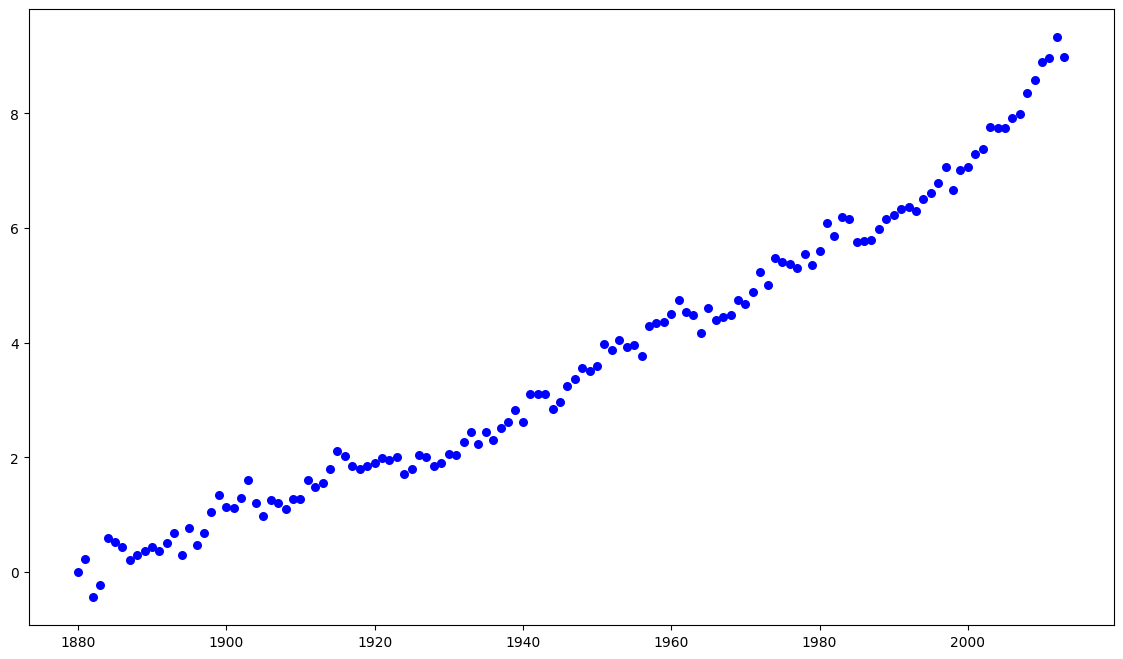

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', s=30, label='Data')

In [6]:
slope1, intercept1, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_full = np.arange(df['Year'].min(), 2051)
ax.plot(x_full, slope1 * x_full + intercept1, 'r', linewidth=2, label='Fit 1880–2050')

In [7]:
df_recent = df[df['Year'] >= 2000]

In [8]:
slope2, intercept2, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
x_recent = np.arange(2000, 2051)
ax.plot(x_recent, slope2 * x_recent + intercept2, 'green', linewidth=2, label='Fit 2000–2050')

In [9]:
ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.legend()
ax.grid(True, alpha=0.3)

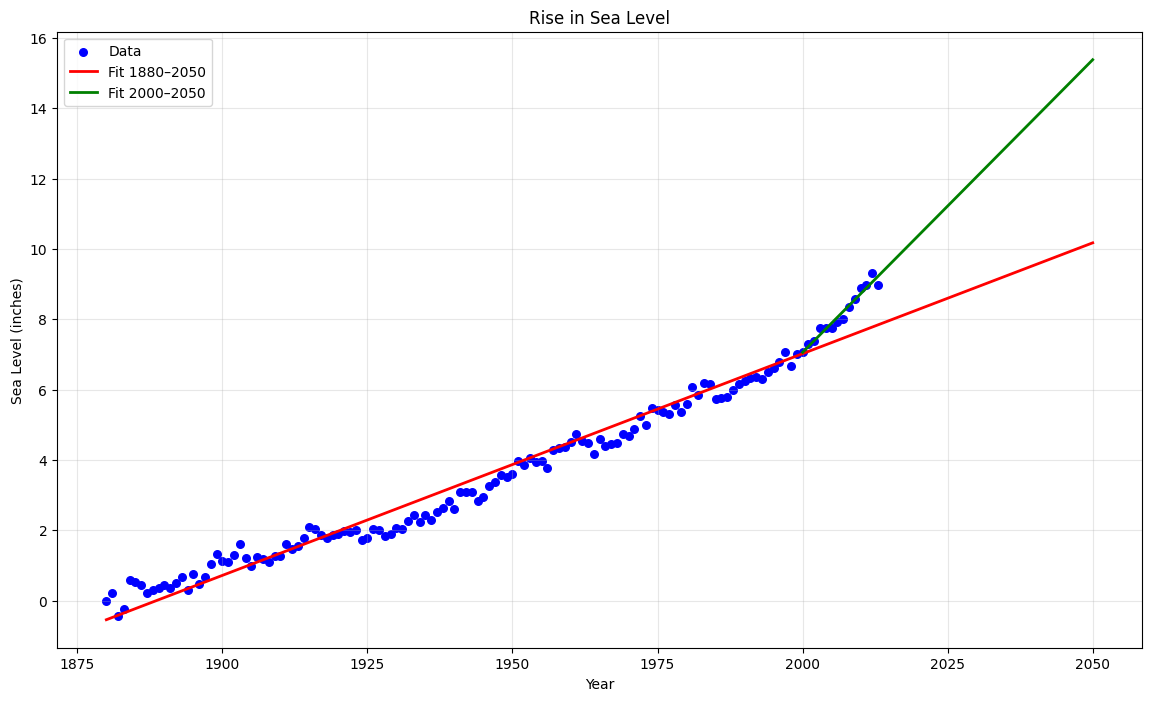

In [15]:
df = pd.read_csv('epa-sea-level.csv')

def draw_plot():

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', s=30, label='Data')


    slope1, intercept1, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    x_full = np.arange(df['Year'].min(), 2051)
    ax.plot(x_full, slope1 * x_full + intercept1, 'r', linewidth=2, label='Fit 1880–2050')


    df_recent = df[df['Year'] >= 2000]
    slope2, intercept2, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    x_recent = np.arange(2000, 2051)
    ax.plot(x_recent, slope2 * x_recent + intercept2, 'green', linewidth=2, label='Fit 2000–2050')


    ax.set_title('Rise in Sea Level')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.legend()
    ax.grid(True, alpha=0.3)


    fig.savefig('sea_level_plot.png')
    plt.close(fig)
    return fig


draw_plot()
